In [1]:
import os
import math

# if you've setup your environment, importing these libraries should not throw an error
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

PATH_TO_DATASET = 'MLPC2025_dataset'

assert os.path.exists(PATH_TO_DATASET), "The dataset folder 'MLPC2025_dataset' does not exist; download the data set and extract its content."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'annotations.csv')), "The file 'MLPC2025_dataset/annotations.csv' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'metadata.csv')), "The file 'MLPC2025_dataset/metadata.csv' does not exist."
assert os.path.exists(os.path.join(PATH_TO_DATASET, 'audio_features')), "The folder 'MLPC2025_dataset/audio_featues' does not exist."

In [2]:
annotations = pd.read_csv("MLPC2025_dataset/annotations.csv")
annotations.head(5)

,task_id,filename,annotator,text,onset,offset,filename_unsafe
0,161977861,560761.mp3,5945971035380930099053858595454362549806990533...,bird twitters nearby with a high pitch two times,16.552368,17.271435,560761_tufted titmouse calling.mp3
1,161987165,240538.mp3,4916274343929406460752597829190197300566135449...,A cow bell clinging repeatedly,12.265866,15.420303,240538_AMB - Cowbell stable Stereowav.mp3
2,161989998,660337.mp3,8960534646813062318784592632173589349806817458...,A child speaks with a high-pitched voice,12.493984,13.315680,660337_Aeroplane Takeoff From Cabinwav.mp3
3,161978339,725686.mp3,4540509031938851510799116530500792274849113758...,A high pitch meowing coming from a cat,16.018221,16.991704,725686_Black Cat Talking.mp3
4,161985729,97606.mp3,1085174475307080254018414698413953957857995126...,An extremely loud brushing sound on a construc...,0.000000,1.626352,97606_jackhammer med distwav.mp3


In [3]:
metadata = pd.read_csv("MLPC2025_dataset/metadata.csv")
metadata.head(2)

,filename,keywords,freesound_id,sound_link,manufacturer,license,title,description,num_downloads,geotag,start_time_s,end_time_s
0,617030.mp3,"atmosphere, general-noise, suburban, ambiance,...",617030,https://freesound.org/people/klankbeeld/sounds...,klankbeeld,https://creativecommons.org/licenses/by/4.0/,suburb night NL 1041PM 210415_0279.wav,Night in a suburban city. All sounds far. Tra...,65,51.7090740261 5.30657821347,15.6,43.535
1,637408.mp3,"jackhammer, construction, reflected",637408,https://freesound.org/people/kyles/sounds/637408/,kyles,http://creativecommons.org/publicdomain/zero/1.0/,construction jackhammer reflected5.flac,construction jackhammer reflected5\n\nrecorded...,23,NaN,209.8,232.356


In [4]:
annotator_counts = annotations.groupby("filename")["annotator"].nunique()
files_with_3_or_more_annotators = annotator_counts[annotator_counts >= 3].index.tolist()
annotations_filtered_3 = annotations[annotations["filename"].isin(files_with_3_or_more_annotators)]

print(annotations_filtered_3.shape)
print(annotations_filtered_3["filename"].drop_duplicates())
# print(annotations_filtered.iloc[50, :])
print(f"There are {len(annotations_filtered_3[['filename']].drop_duplicates())} audio files with >= 3 annotators")


(55, 7)
691      407115.mp3
1463     582364.mp3
1851     424366.mp3
2152     352781.mp3
4199     515081.mp3
12871    535624.mp3
Name: filename, dtype: object
There are 6 audio files with >= 3 annotators


In [5]:
# analyzing annotations for 515081.mp3
an_3 = annotations_filtered_3.loc[annotations_filtered_3['filename'] == '515081.mp3']
a3_01 =  annotations.loc[(annotations["filename"] == "515081.mp3") & (annotations["annotator"] == an_3['annotator'].drop_duplicates().iloc[0])]
a3_02 =  annotations.loc[(annotations["filename"] == "515081.mp3") & (annotations["annotator"] == an_3['annotator'].drop_duplicates().iloc[1])]
a3_03 =  annotations.loc[(annotations["filename"] == "515081.mp3") & (annotations["annotator"] == an_3['annotator'].drop_duplicates().iloc[2])]

keywords = metadata[metadata['filename'] == '515081.mp3']['keywords'].iloc[0]
print(f"File 515081.mp3\n")
print(f"The file 515081.mp3 has {len(an_3)} annotations by {len(an_3['annotator'].drop_duplicates())} annotators")
print(f"metadata keywords: \n{keywords}:")
print(f" \n\nthe following annotations by 3 annotators", "\n")
print(f"a3_01 with id {a3_01.iloc[0, 2]}:\n {a3_01[['text', 'onset', 'offset']]}")
print("-" * 70)
print(f"a3_02 with id {a3_03.iloc[0, 2]}:\n {a3_02[['text', 'onset', 'offset']]}")
print("-" * 70)
print(f"a3_03 with id {a3_02.iloc[0, 2]}:\n {a3_03[['text', 'onset', 'offset']]}")
print("-" * 70)

File 515081.mp3

The file 515081.mp3 has 12 annotations by 3 annotators
metadata keywords: 
tweeting, birds, field-recording, nature:
 

the following annotations by 3 annotators 

a3_01 with id 84704702810492203570508455757276662194775685610231578309011132791728316253685:
                                             text      onset     offset
4199                       birds chirping loudly  10.506879  12.054767
7035   birds chirping silently in the background  18.551208  21.037211
8330                       birds chirping loudly  14.540770  18.574661
15031                      birds chirping loudly   0.000000   2.931607
25424  birds chirping silently in the background   2.837795  10.553785
25447  birds chirping silently in the background  12.007862  14.564223
----------------------------------------------------------------------
a3_02 with id 59535453388221859414776057874886065313858315756409120839410492187345784607095:
                                                    text  onset 

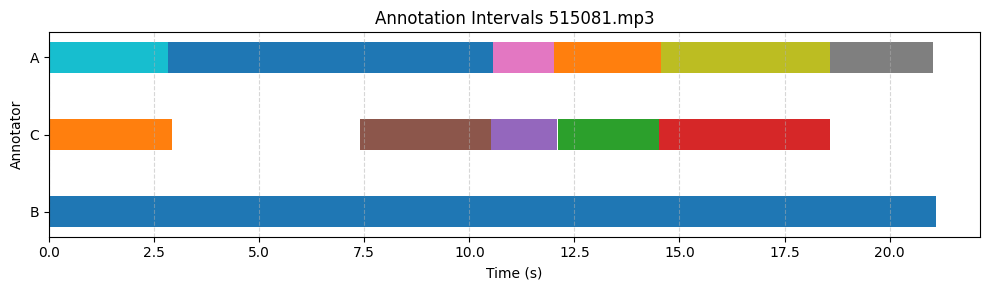

In [24]:
# Data: (onset, offset, label)
a3_01 = [
    (10.506879, 12.054767),
    (18.551208, 21.037211),
    (14.540770, 18.574661),
    (0.000000, 2.931607),
    (2.837795, 10.553785),
    (12.007862, 14.564223),
]

a3_02 = [
    (0.0, 21.095986),
]

a3_03 = [
    (0.000000, 2.937546),
    (12.115098, 14.523521),
    (14.505276, 18.592297),
    (10.527728, 12.078607),
    (7.407726, 10.509483),
]

annotators = ['B', 'C', 'A']
annotations = [a3_02, a3_03, a3_01]

# Plot
fig, ax = plt.subplots(figsize=(10, 3))

for i, (label, anns) in enumerate(zip(annotators, annotations)):
    for (start, end) in anns:
        ax.barh(y=label, width=end - start, left=start, height=0.4)

# Styling
ax.set_xlabel("Time (s)")
ax.set_ylabel("Annotator")
ax.set_title("Annotation Intervals 515081.mp3")
ax.grid(True, axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("annotation_intervals")
plt.show()


In [6]:

files_with_2_or_more_annotators = annotator_counts[annotator_counts >= 2].index.tolist()
annotations_filtered_2 = annotations[annotations["filename"].isin(files_with_2_or_more_annotators)]

print(annotations_filtered_2.shape)
print(annotations_filtered_2.iloc[1, :])
print(f"There are {len(annotations_filtered_2[['filename']].drop_duplicates())} audio files with >= 2 annotators")
filename_2 = annotations_filtered_2.iloc[1, 1]
an_2 = annotations_filtered_2.loc[annotations_filtered_2['filename'] == filename_2]


# print(an_64)
print(f"The file {filename_2} has {len(an_2)} annotations by {len(an_2['annotator'].drop_duplicates())} annotators")

(5423, 7)
task_id                                                    161985829
filename                                                   56696.mp3
annotator          1688441243399859095829520104641879070247532203...
text                          A man talking loudly in the background
onset                                                      25.802332
offset                                                     27.372698
filename_unsafe                                56696_58_GRASSwav.mp3
Name: 11, dtype: object
There are 731 audio files with >= 2 annotators
The file 56696.mp3 has 6 annotations by 2 annotators


In [7]:
# analyzing annotations for 56696.mp3

a2_01 =  annotations.loc[(annotations["filename"] == "56696.mp3") & (annotations["annotator"] == an_2['annotator'].drop_duplicates().iloc[0])]
a2_02 =  annotations.loc[(annotations["filename"] == "56696.mp3") & (annotations["annotator"] == an_2['annotator'].drop_duplicates().iloc[1])]

keywords = metadata[metadata['filename'] == '56696.mp3']['keywords'].iloc[0]
print(f"File 56696.mp3\n")
print(f"metadata keywords: \n{keywords}:")
print(f" \n\nthe following annotations by 2 annotators", "\n")
print(f"a2_01 with id {a2_01.iloc[0, 2]}:\n {a2_01[['text', 'onset', 'offset']]}")
print("-" * 70)
print(f"a2_02 with id {a2_02.iloc[0, 2]}:\n {a2_02[['text', 'onset', 'offset']]}")
print("-" * 70)


File 56696.mp3

metadata keywords: 
ambiance, cutter, grass, industry, machine:
 

the following annotations by 2 annotators 

a2_01 with id 16884412433998590958295201046418790702475322036579696423693650596719891757391:
                                               text      onset     offset
11          A man talking loudly in the background  25.802332  27.372698
4406   A loud grass-cutting machine sound outdoors   0.000000  27.372698
27841     A kid screaming loudly in the background  23.241426  23.869573
----------------------------------------------------------------------
a2_02 with id 31399784615888520779712022413793685228274804251028833560156799174446262728298:
                                                     text      onset     offset
5035   Lawnmower is buzzing with a wavering uneven pa...   3.593855  23.574371
11214  Man is yelling a short phrase overlapping with...  26.245034  27.431995
32062     Lawnmower is buzzing with a wavering intensity   0.065942   3.132259
------